In [1]:
%pylab inline

pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure"
pathchow='/home/jfm343/Documents/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'

pathy=pathchow

import numpy as np
import pandas as pd
import os
sys.path.insert(0, pathy+'/Mods')
import Dispersion
import MoireLattice
from scipy import linalg as la
import seaborn as sns


rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 14})
rc('text', usetex=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
Nsamp=6
modulation_theta=1.05
modulation_kappa=0.5
mode='T'
print("\n \n")
print("lattice sampling...") 

#Lattice parameters 
#lattices with different normalizations
theta=modulation_theta*np.pi/180  # magic angle
c6sym=True
umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one
[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)
print(f"taking {umkl} umklapps")
VV=lq.boundary()
#kosh params realistic  -- this is the closest to the actual Band Struct used in the paper
# hbvf = 2.1354; # eV
# hvkd=hbvf*q
# kappa_p=0.0797/0.0975
# kappa=kappa_p
# up = 0.0975; # eV
# u = kappa*up; # eV
# alpha=up/hvkd
# alph=alpha
PH=True

#JY params 
hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
hvkd=hbvf*q
kappa=modulation_kappa
up = 0.105; # eV
u = kappa*up; # eV
alpha=up/hvkd
alph=alpha
#Andrei params 
# hbvf = 19.81/(8*np.pi/3); # eV
# hvkd=hbvf*q
# kappa=1
# up = 0.110; # eV
# u = kappa*up; # eV
# alpha=up/hvkd
# alph=alpha
print("\n \n")
print("parameters of the hamiltonian...")
print("hbvf is ..",hbvf )
print("q is...", q)
print("hvkd is...", hvkd)
print("kappa is..", kappa)
print("alpha is..", alph)
print("the twist angle is ..", theta)
print("\n \n")
#electron parameters
nbands=2
nremote_bands=0
hbarc=0.1973269804*1e-6 #ev*m
alpha=137.0359895 #fine structure constant
a_graphene=2.458*(1e-10) #in meters this is the lattice constant NOT the carbon-carbon distance
e_el=1.6021766*(10**(-19))  #in joule/ev
ee2=(hbarc/a_graphene)/alpha
eps_inv = 1/10
d_screening=20*(1e-9)/a_graphene
d_screening_norm=d_screening*lq.qnor()
epsilon_0 = 8.85*1e-12
ev_conv = e_el
Vcoul=( e_el*e_el*eps_inv*d_screening/(2*epsilon_0*a_graphene) )
V0= (  Vcoul/lq.Vol_WZ() )/ev_conv
print(V0, 'la energia de coulomb en ev')
print("\n \n")
#phonon parameters
c_light=299792458 #m/s
M=1.99264687992e-26 * (c_light*c_light/e_el) # [in units of eV]
mass=M/(c_light**2) # in ev *s^2/m^2
alpha_ep=0 # in ev
beta_ep=4 #in ev SHOULD ALWAYS BE GREATER THAN ZERO
if mode=="L":
    c_phonon=21400 #m/s
if mode=="T":
    c_phonon=13600 #m/s
else:
    c_phonon=21400 #m/s

#calculating effective coupling
A1mbz=lq.VolMBZ*((q**2)/(a_graphene**2))
AWZ_graphene=np.sqrt(3)*a_graphene*a_graphene/2
A1bz=(2*np.pi)**2 / AWZ_graphene
alpha_ep_effective=np.sqrt(1/2)*np.sqrt(A1mbz/A1bz)*alpha_ep #sqrt 1/2 from 2 atoms per unit cell in graphene
beta_ep_effective=np.sqrt(1/2)*np.sqrt(A1mbz/A1bz)*beta_ep #sqrt 1/2 from 2 atoms per unit cell in graphene
alpha_ep_effective_tilde=alpha_ep_effective/beta_ep_effective
beta_ep_effective_tilde=beta_ep_effective/beta_ep_effective

#testing the orders of magnitude for the dimensionless velocity squared
qq=q/a_graphene
Wupsilon=(beta_ep_effective**2)*qq*qq
W=0.008
#ctilde=W*(qq**2)*(mass)*(c_phonon**2)/Wupsilon
print("phonon params", Wupsilon )
print("phonon params upsilon", Wupsilon/W )
print("area ratio", A1mbz/A1bz, (2*np.sin(theta/2))**2   )
print("correct factor by which the interaction is reduced",np.sqrt(2)/(2*np.sin(theta/2)))
print("c tilde",np.sqrt((Wupsilon/W)*(1/(qq**2))*(1/mass) ))
print("\n \n")
    
#parameters to be passed to the Bubble class
mode_layer_symmetry="a" #whether we are looking at the symmetric or the antisymmetric mode
cons=[alpha_ep_effective_tilde,beta_ep_effective_tilde, Wupsilon, a_graphene, mass] #constants used in the bubble calculation and data anlysis

#rescaling coupling constant
rf=1.75
gp2=(rf)**2
print(beta_ep*rf) #rescaling so that the coupling is given by
    


 

lattice sampling...
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.0073871612548828125  s
size of q before symmetr... 36
size of q after symmetr... 43
size of q before symmetr... 36
size of q after symmetr... 43
36 1bz numer of sampling lattice points
43 X numer of sampling lattice points
252 Q numer of sampling lattice points
the shape of the index q array (36, 43)
1 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (36, 1)
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.004233837127685547  s
size of q before symmetr... 36
size of q after symmetr... 43
size of q before symmetr... 36
size of q after symmetr... 43
36 1bz numer of sampling lattice points
43 X numer of sampling lattice points
252 Q numer of sampling lattice points
the shape of the index q array (36, 43)
1 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of t

## For $\kappa$= 0.7

In [78]:
kappa=0.75
path=pathy+'/data/trans_0_2023-02-21-18-27-54'
subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
tdos=[]
thetass=[]
eners=[]
fils=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'mode_T_')
    for d in data:
        fullpath=fulpath+'/'+d
        print(fullpath)
    
        dff = pd.read_hdf(fullpath)
        frames.append(dff)

        

df=pd.concat(frames).sort_values(['theta', 'nu'])




['inforun', 'trans_0_1.05']
/home/jfm343/Documents/BM_bandstructure/data/trans_0_2023-02-21-18-27-54/trans_0_1.05/data6_mode_T_symmetry_a_alpha_0.0_beta_1.0_umklp_1_kappa_0.75_theta_0.01832595714594046_modeHF_0_nu_2.166666666666667_T_0.0.h5
/home/jfm343/Documents/BM_bandstructure/data/trans_0_2023-02-21-18-27-54/trans_0_1.05/data6_mode_T_symmetry_a_alpha_0.0_beta_1.0_umklp_1_kappa_0.75_theta_0.01832595714594046_modeHF_0_nu_2.6_T_0.0.h5
/home/jfm343/Documents/BM_bandstructure/data/trans_0_2023-02-21-18-27-54/trans_0_1.05/data6_mode_T_symmetry_a_alpha_0.0_beta_1.0_umklp_1_kappa_0.75_theta_0.01832595714594046_modeHF_0_nu_3.033333333333333_T_0.0.h5
/home/jfm343/Documents/BM_bandstructure/data/trans_0_2023-02-21-18-27-54/trans_0_1.05/data6_mode_T_symmetry_a_alpha_0.0_beta_1.0_umklp_1_kappa_0.75_theta_0.01832595714594046_modeHF_0_nu_0.8666666666666667_T_0.0.h5
/home/jfm343/Documents/BM_bandstructure/data/trans_0_2023-02-21-18-27-54/trans_0_1.05/data6_mode_T_symmetry_a_alpha_0.0_beta_1.0_umkl

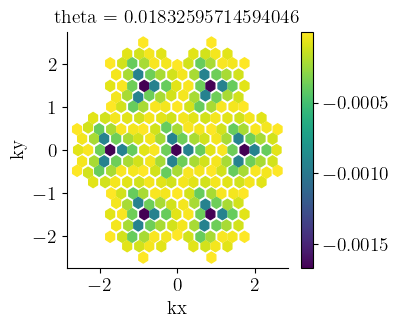

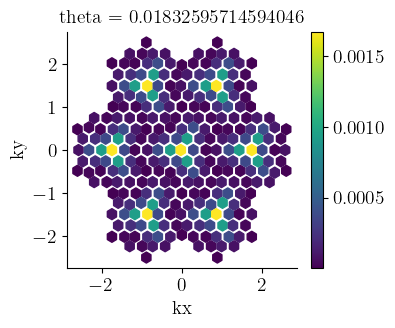

In [79]:
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Ep1', cbar=False, square = True)
# get figure background color


# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Ep2', cbar=False, square = True)
# get figure background color




[0.01832596]


/tmp/ipykernel_52169/2101220766.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('magma')


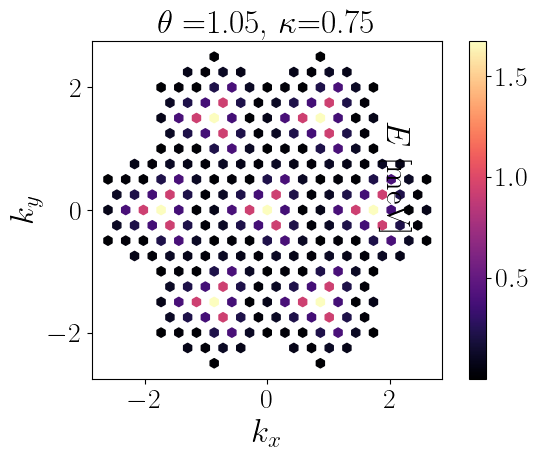

In [80]:
cTrans=13600

thetaarr=np.sort(np.array(df['theta'].unique()))
print(thetaarr)
indthet=0
indnumax=0

df_one_temp=df.loc[(df['nu'] == 0)&(df['theta'] == thetaarr[indthet])]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    color_map = plt.cm.get_cmap('magma')
    im=plt.scatter(d1,d2 ,c=d3*1000,s=45, cmap=color_map, marker='h')
    
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$k_y$', size=24)
    
    plt.xticks( size=20)
    plt.yticks( size=20)
    plt.text(1.8,-0.3,r'$E$ [meV]', size=24, rotation=270)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    plt.title(r'$\theta=$'+str(np.round(thetaarr[indthet]*180/np.pi, 2)) +r', $\kappa$='+str(kappa), size=24)
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    
    
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


draw_heatmap( 'kx', 'ky', 'Ep2',data=df_one_temp)
plt.savefig('imgs/disp07.png', dpi=400)

[0.         0.43333333 0.86666667 1.3        1.73333333 2.16666667
 2.6        3.03333333 3.46666667 3.9       ] 2.166666666666667


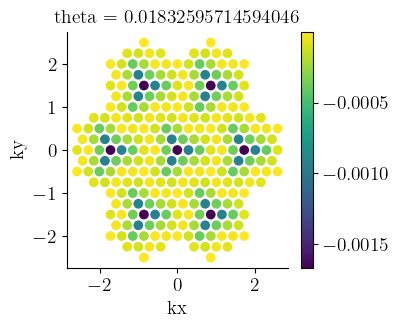

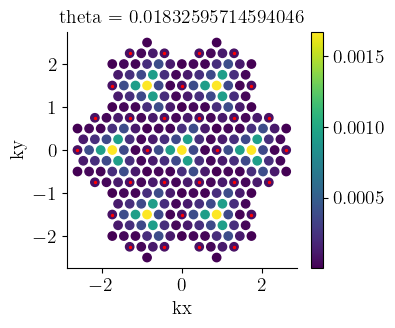

In [81]:
nu=df.loc[:,'nu'].unique()
mu=df.loc[:,'mu'].unique()
print(nu, nu[5])
# print(mu,mu[5])
indnumax=5
eps=2e-5

#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == nu[indnumax]]


def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    aa=np.where(np.abs(d3 -d4[indnumax])<eps)[0]
    plt.scatter(d1,d2 ,c=d3)
    plt.colorbar()
    plt.scatter(d1[aa],d2[aa] ,c='r', s=2)
    

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Ep1', 'mu', cbar=False, square = True)
# get figure background color


# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == nu[indnumax]]

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    aa=np.where(np.abs(d3 -d4[indnumax])<eps)[0]
    plt.scatter(d1,d2 ,c=d3)
    plt.colorbar()
    plt.scatter(d1[aa],d2[aa] ,c='r', s=2)
    
    

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Ep2', 'mu', cbar=False, square = True)
# get figure background color

/tmp/ipykernel_52169/907683090.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('magma')


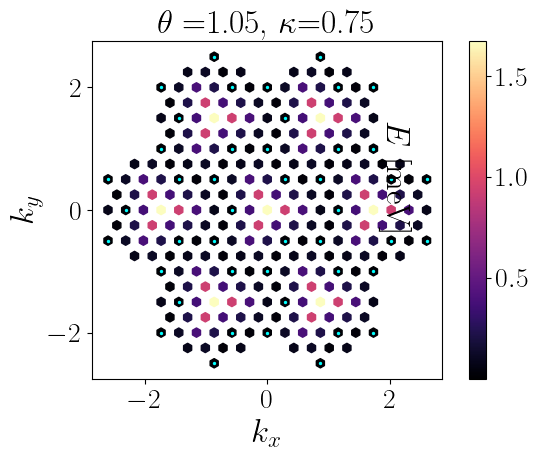

In [82]:
cTrans=13600

thetaarr=np.sort(np.array(df['theta'].unique()))
indthet=0
indnumax=0
eps=2e-5

df_one_temp=df.loc[(df['nu'] == nu[indnumax])&(df['theta'] == thetaarr[indthet])]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    color_map = plt.cm.get_cmap('magma')
    im=plt.scatter(d1,d2 ,c=d3*1000,s=45, cmap=color_map, marker='h')
    
    
    
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$k_y$', size=24)
    
    plt.xticks( size=20)
    plt.yticks( size=20)
    plt.text(1.8,-0.3,r'$E$ [meV]', size=24, rotation=270)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    plt.title(r'$\theta=$'+str(np.round(thetaarr[indthet]*180/np.pi, 2)) +r', $\kappa$='+str(kappa), size=24)
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    
    aa=np.where(np.abs(d3 -d4[indnumax])<eps)[0]
    plt.scatter(d1[aa],d2[aa] ,c='cyan', s=2)
    
    
    
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    
    
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


draw_heatmap( 'kx', 'ky', 'Em2','mu',data=df_one_temp)
plt.savefig('imgs/dispopt07.png', dpi=400)

/tmp/ipykernel_52169/4187421819.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('magma')


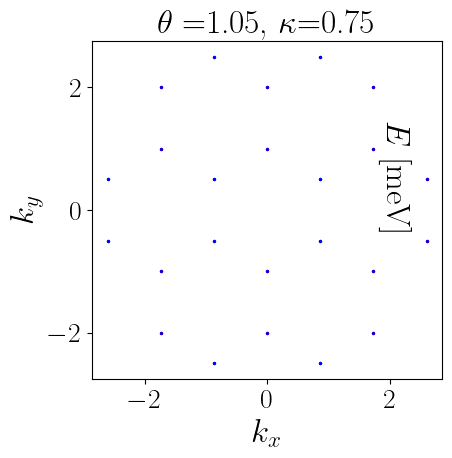

In [83]:
cTrans=13600

thetaarr=np.sort(np.array(df['theta'].unique()))
indthet=0
indnumax=0
eps=1.3e-5

df_one_temp=df.loc[(df['nu'] == nu[indnumax])&(df['theta'] == thetaarr[indthet])]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    d5 = np.array(data.loc[:,args[4]])
    color_map = plt.cm.get_cmap('magma')
    # im=plt.scatter(d1,d2 ,c=d3*1000,s=45, cmap=color_map, marker='h')
    
    
    
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$k_y$', size=24)
    
    plt.xticks( size=20)
    plt.yticks( size=20)
    plt.text(1.8,-0.3,r'$E$ [meV]', size=24, rotation=270)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    plt.title(r'$\theta=$'+str(np.round(thetaarr[indthet]*180/np.pi, 2)) +r', $\kappa$='+str(kappa), size=24)
    # cbar = plt.colorbar(im)
    # tick_font_size = 20
    # cbar.ax.tick_params(labelsize=tick_font_size)
    
    
    aa=np.where(np.abs(d3 -d4[indnumax])<eps)[0]
    plt.scatter(d1[aa],d2[aa] ,c='r', s=2)
    
    aa=np.where(np.abs(d5 -d4[indnumax])<eps)[0]
    plt.scatter(d1[aa],d2[aa] ,c='b', s=2)
    
    
    
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    
    
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


draw_heatmap( 'kx', 'ky', 'Ep2','mu','Em2',data=df_one_temp)
plt.savefig('imgs/dispopt_2_07.png', dpi=400)

Just plotting the Fermi surfaces one notices the stark difference near magic angle for $\kappa=0.7$ where additional dirac cones appear in the middle of the $\Gamma-K$ line. The bandwidth is also dramatically lower than for nearby twist angles (Almost one order of magnitude lower than neighbouring angles). This is reflected in the Bubbles below

[0.         0.43333333 0.86666667 1.3        1.73333333 2.16666667
 2.6        3.03333333 3.46666667 3.9       ] 2.166666666666667


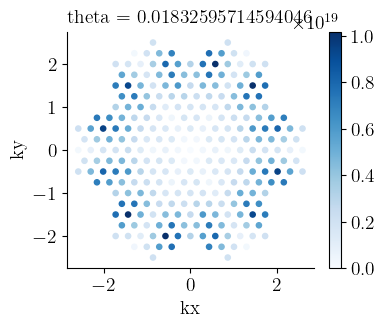

In [84]:
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()

nu=df.loc[:,'nu'].unique()
print(nu, nu[5])
indnumax=0

df_one_temp=df.loc[df['nu'] == nu[indnumax]]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = gp2*data.loc[:,args[2]]
    plt.scatter(d1,d2 ,c=d3,s=14, cmap='Blues')
    # plt.hexbin(d1,d2 ,C=d3,sizes=2*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color





/tmp/ipykernel_52169/1994196994.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('YlGnBu')


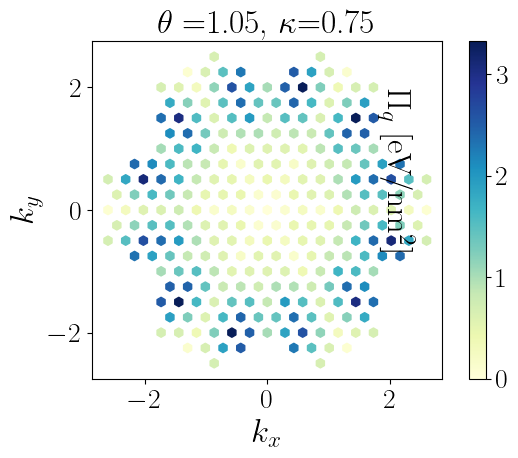

In [85]:
cTrans=13600
nm_2=1e+18
thetaarr=np.sort(np.array(df['theta'].unique()))
indthet=0
indnumax=0

df_one_temp=df.loc[(df['nu'] == 0)&(df['theta'] == thetaarr[indthet])]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    color_map = plt.cm.get_cmap('YlGnBu')
    im=plt.scatter(d1,d2 ,c=d3/nm_2,s=45, cmap=color_map, marker='h')
    
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$k_y$', size=24)
    
    plt.xticks( size=20)
    plt.yticks( size=20)
    plt.text(1.8,-0.6,r'$\Pi_q$ [eV/nm$^2$]', size=24, rotation=270)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    plt.title(r'$\theta=$'+str(np.round(thetaarr[indthet]*180/np.pi, 2)) +r', $\kappa$='+str(kappa), size=24)
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    
    
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


draw_heatmap( 'kx', 'ky', 'bub',data=df_one_temp)
plt.savefig('imgs/bub07_107.png', dpi=400)

[-2.59807621 -2.30940108 -2.02072594 -1.73205081 -1.44337567 -1.15470054
 -0.8660254  -0.57735027 -0.28867513  0.          0.28867513  0.57735027
  0.8660254   1.15470054  1.44337567  1.73205081  2.02072594  2.30940108
  2.59807621]
[-2.59807621 -2.30940108 -2.02072594 -1.73205081 -1.44337567 -1.15470054
 -0.8660254  -0.57735027 -0.28867513  0.          0.28867513  0.57735027
  0.8660254   1.15470054  1.44337567  1.73205081  2.02072594  2.30940108
  2.59807621]
[-2.59807621 -2.30940108 -2.02072594 -1.73205081 -1.44337567 -1.15470054
 -0.8660254  -0.57735027 -0.28867513  0.          0.28867513  0.57735027
  0.8660254   1.15470054  1.44337567  1.73205081  2.02072594  2.30940108
  2.59807621]
[-2.59807621 -2.30940108 -2.02072594 -1.73205081 -1.44337567 -1.15470054
 -0.8660254  -0.57735027 -0.28867513  0.          0.28867513  0.57735027
  0.8660254   1.15470054  1.44337567  1.73205081  2.02072594  2.30940108
  2.59807621]
[-2.59807621 -2.30940108 -2.02072594 -1.73205081 -1.44337567 -1.1547

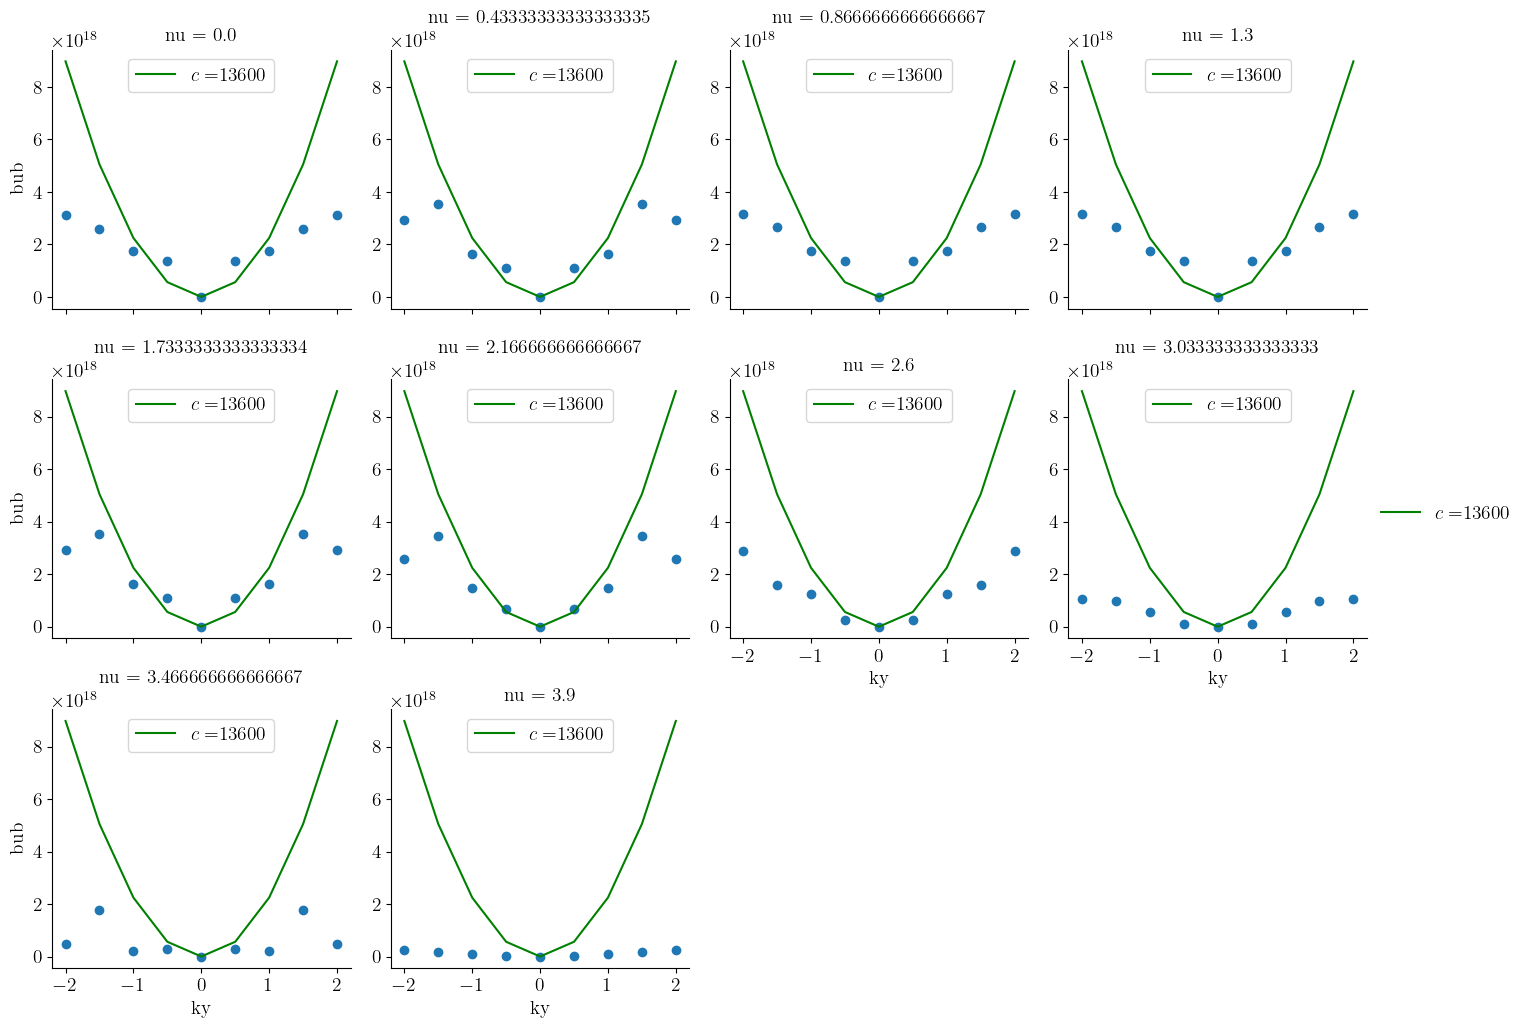

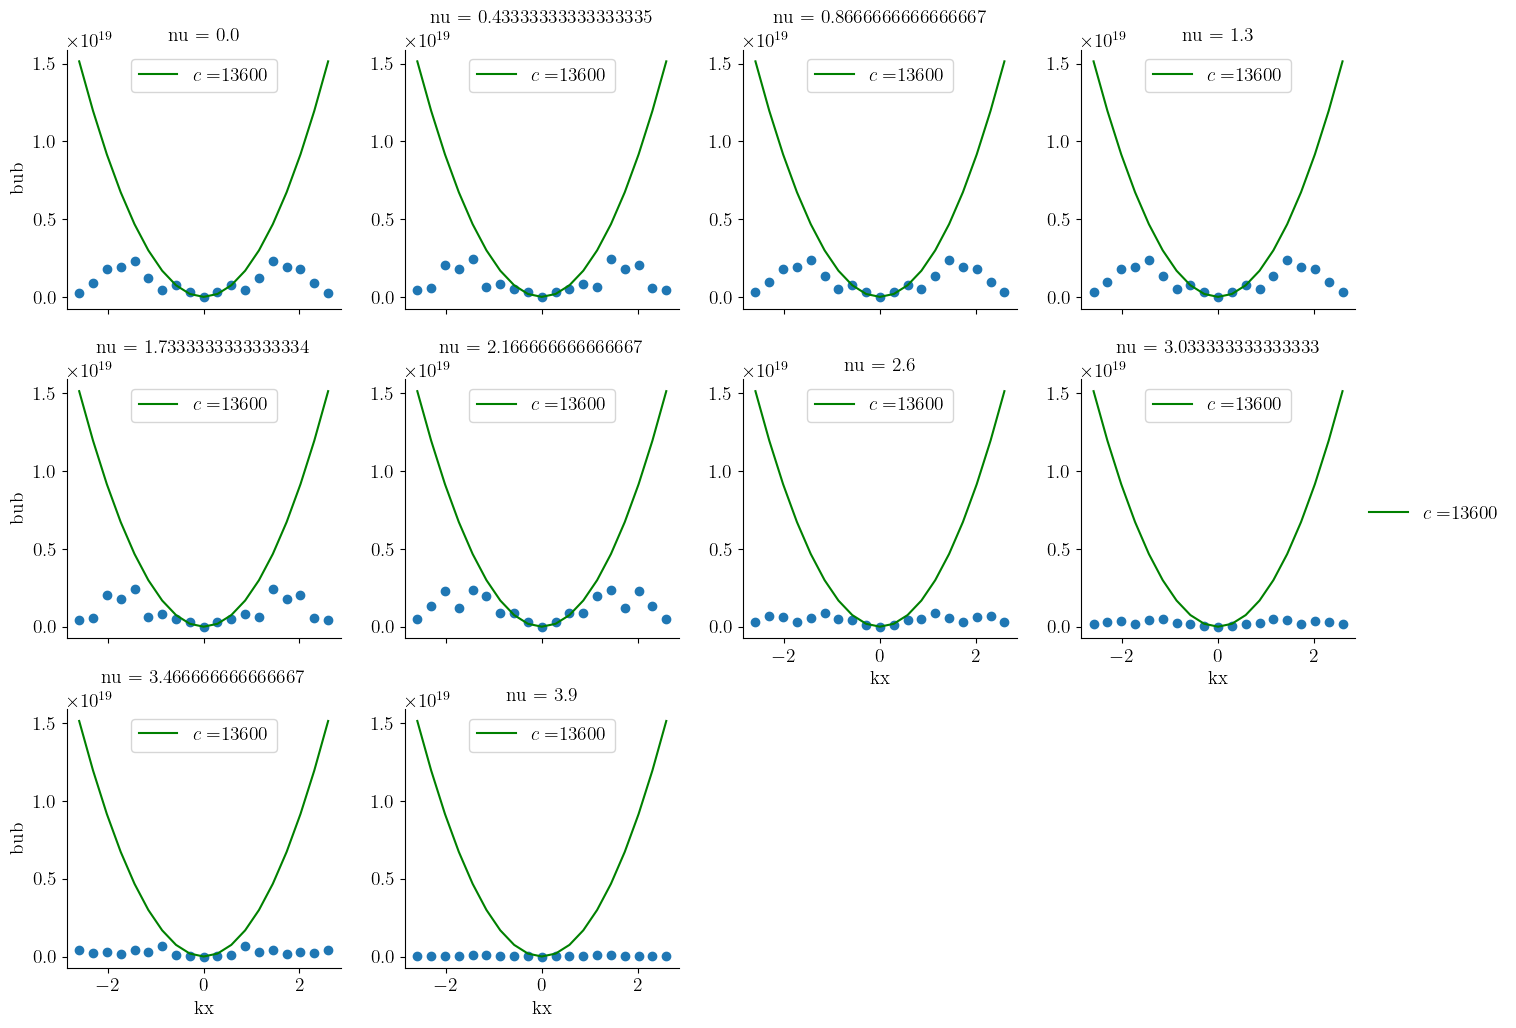

In [86]:
thrs=1e-9
df_one_temp=df.loc[ (df['kx'] < thrs )& (df['kx'] > -thrs)]

def xcut(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    th = data.loc[:,args[2]]
    q0=2*np.sin(th/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,gp2*d2)
    plt.plot(d1, cons*d1*d1*(cTrans**2),c='g', label=r'$c=$'+str(cTrans))
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='nu',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(xcut, 'ky', 'bub', 'theta', cbar=False, square = True)
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()

df_one_temp=df.loc[ (df['ky'] < thrs )& (df['ky'] > -thrs)]
def ycut(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    th = np.array(data.loc[:,args[2]])
    q0=2*np.sin(th/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,gp2*d2)
    print(d1)
    plt.plot(d1, cons*d1*d1*(cTrans**2),c='g', label=r'$c=$'+str(cTrans))


fg = sns.FacetGrid(df_one_temp, col='nu',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(ycut, 'kx', 'bub','theta', cbar=False, square = True)
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()

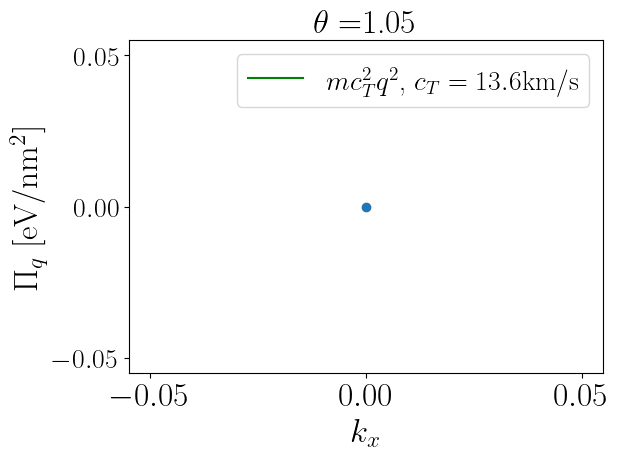

In [76]:
cTrans=13600

thetaarr=np.sort(np.array(df['theta'].unique()))
indthet=0

df_one_temp=df.loc[(df['nu'] == nu[indnumax])&(df['theta'] == thetaarr[indthet])&( (df['kx'] == 0.0))]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    th = data.loc[:,args[2]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,gp2*d2/1e+18)
    plt.plot(d1, cons*d1*d1*(cTrans**2)/nm_2,c='g', label=r'$m c_T^2 q^2$,  $c_T=13.6$km/s')
    
    plt.legend(fontsize=20)
    plt.xticks(size=24)
    plt.yticks(size=20)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$\Pi_q$  [eV/nm$^2$]', size=24)
    plt.title(r'$\theta=$'+str(np.round(thetaarr[indthet]*180/np.pi, 2)) , size=24)
    plt.tight_layout()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)
draw_heatmap('ky', 'bub','theta',data=df_one_temp)
plt.savefig('imgs/c_ext_07.png', dpi=400)

/tmp/ipykernel_52169/1787633061.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('Blues')


KeyError: 'delt_cph'

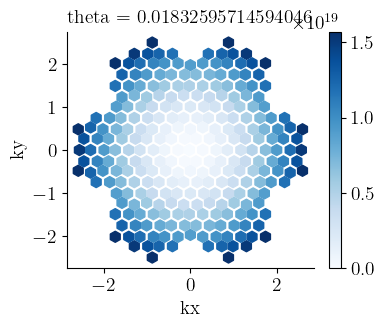

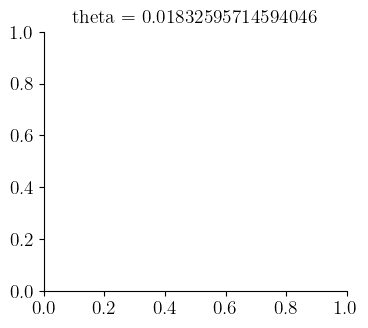

In [77]:
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()

cTrans=13600
df_one_temp=df.loc[df['nu'] == nu[indnumax]]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    d3 = cons*(cTrans**2) * (d2**2 +d1**2)-gp2*data.loc[:,args[2]]
    color_map = plt.cm.get_cmap('Blues')
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)), cmap=color_map)
    
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4,sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color


# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[(df['nu'] == nu[indnumax]) & (df['ky'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = gp2*data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2,label=r'$-\Pi_q$ [ev/m$^2$]')
    # plt.plot(d1, cons*d1*d1*d3*d3)
    plt.plot(d1, cons*(cTrans**2)*d1*d1, c='r', label=r'$K_q$')
    plt.scatter(d1,cons*(cTrans**2)*d1*d1-d2,c='g',label=r'$K_q+\Pi_q$ [ev/m$^2$]')
    plt.legend()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'bub', 'delt_cph','theta', cbar=False, square = True)
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()
# get figure background color


df_one_temp=df.loc[(df['nu'] == nu[indnumax]) & (df['kx'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = gp2*data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2,label=r'$-\Pi_q$ [ev/m$^2$]')
    # plt.plot(d1, cons*d1*d1*d3*d3)
    plt.plot(d1, cons*(cTrans**2)*d1*d1, c='r', label=r'$K_q$ [ev/m$^2$]')
    plt.scatter(d1,cons*(cTrans**2)*d1*d1-d2,c='g',label=r'$K_q+\Pi_q$ [ev/m$^2$]')
    plt.legend()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'ky', 'bub', 'delt_cph','theta', cbar=False, square = True)
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()
# get figure background color

In [ ]:
df['nu']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18375    3.9
18376    3.9
18377    3.9
18378    3.9
18379    3.9
Name: nu, Length: 128660, dtype: float64

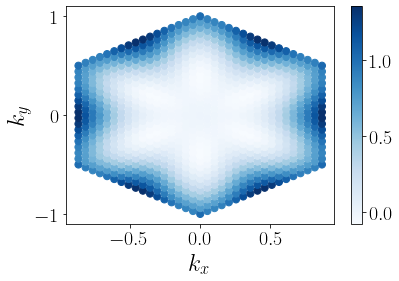

In [ ]:
cTrans=13600

thetaarr=np.sort(np.array(df['theta'].unique()))
indthet=4

df_one_temp=df.loc[(df['nu'] == nu[indnumax])&(df['theta'] == thetaarr[indthet])]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    d3 = cons*(cTrans**2) * (d2**2 +d1**2)-gp2*data.loc[:,args[2]]
    color_map = plt.cm.get_cmap('Blues')
    im=plt.scatter(d1,d2 ,c=d3/1e+18,s=50, cmap=color_map)
    
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$k_y$', size=24)
    
    plt.xticks( size=20)
    plt.yticks( size=20)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


draw_heatmap( 'kx', 'ky', 'bub',data=df_one_temp)


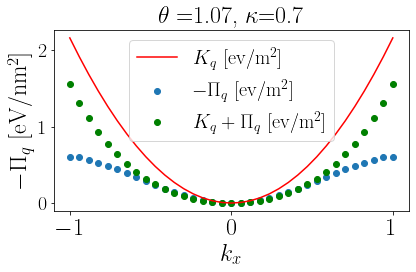

In [ ]:
cTrans=13600

thetaarr=np.sort(np.array(df['theta'].unique()))
indthet=6

df_one_temp=df.loc[(df['nu'] == nu[indnumax])&(df['theta'] == thetaarr[indthet])&( (df['kx'] == 0.0))]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = gp2*data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2/1e+18,label=r'$-\Pi_q$ [ev/m$^2$]')
    # plt.plot(d1, cons*d1*d1*d3*d3)
    plt.plot(d1, cons*(cTrans**2)*d1*d1/1e+18, c='r', label=r'$K_q$ [ev/m$^2$]')
    plt.scatter(d1,(cons*(cTrans**2)*d1*d1-d2)/1e+18,c='g',label=r'$K_q+\Pi_q$ [ev/m$^2$]')
    
    plt.legend(fontsize=20)
    plt.xticks(size=24)
    plt.yticks(size=20)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$-\Pi_q$  [eV/nm$^2$]', size=24)
    plt.title(r'$\theta=$'+str(np.round(thetaarr[indthet]*180/np.pi, 2)) +r', $\kappa$='+str(kappa), size=24)
    plt.tight_layout()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)
draw_heatmap( 'ky', 'bub', 'delt_cph','theta',data=df_one_temp)
plt.savefig('imgs/stiffness_07noins.png', dpi=400)

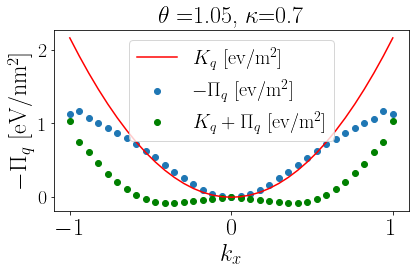

In [ ]:
cTrans=13600

thetaarr=np.sort(np.array(df['theta'].unique()))
indthet=4

df_one_temp=df.loc[(df['nu'] == nu[indnumax])&(df['theta'] == thetaarr[indthet])&( (df['kx'] == 0.0))]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = gp2*data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2/1e+18,label=r'$-\Pi_q$ [ev/m$^2$]')
    # plt.plot(d1, cons*d1*d1*d3*d3)
    plt.plot(d1, cons*(cTrans**2)*d1*d1/1e+18, c='r', label=r'$K_q$ [ev/m$^2$]')
    plt.scatter(d1,(cons*(cTrans**2)*d1*d1-d2)/1e+18,c='g',label=r'$K_q+\Pi_q$ [ev/m$^2$]')
    
    plt.legend(fontsize=20)
    plt.xticks(size=24)
    plt.yticks(size=20)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$-\Pi_q$  [eV/nm$^2$]', size=24)
    plt.title(r'$\theta=$'+str(np.round(thetaarr[indthet]*180/np.pi, 2)) +r', $\kappa$='+str(kappa), size=24)
    plt.tight_layout()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)
draw_heatmap( 'ky', 'bub', 'delt_cph','theta',data=df_one_temp)
plt.savefig('imgs/stiffness_07.png', dpi=400)